In [64]:
# 영상처리에 있어서 핵심적인 matplotlib과 opencv , numpy 가져오기
%matplotlib inline
import matplotlib.pyplot as plt
import cv2
import numpy as np
import os
if not os.path.exists("len_top.jpg"):
    # 영상처리에 있어서 가장 많이 이용되는 Lena 이미지 활용하기
    !wget http://www.lenna.org/len_top.jpg
    !wget http://www.topdaily.kr/news/photo/201804/50063_14445_4651.png
        
    os.rename("50063_14445_4651.png","logo.png")

### reference : 
1. [opencv documentation](https://docs.opencv.org/3.0-beta/modules/imgproc/doc/drawing_functions.html)

<h1 style = "background-color: rgba(185, 109, 106, 0.3);" > 영상은 어떤 식으로 그릴 수 있는가? </h1>

### 1. line을 그리기

`cv2.line(img, pt1, pt2, color, thickness, lineType, shift)`

**parameters**
* img : Image where the circle is drawn.
* pt1 : First point of the line segment
* pt2 : Second point of the line segment
* color : Line Color
* thickness : Line Thickness
* lineType :
    * LINE_8 : 8-connected line
    * LINE_4 : 4-connected line
    * LINE_AA : antialiased line.
* shift : Number of fractional bits in the point coordinates

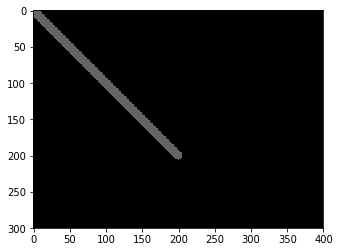

In [23]:
canvas = np.zeros((300,400,3),dtype=np.uint8)

cv2.line(canvas, (0,0), (200,200), 
         (100,100,100), 10, cv2.LINE_8,0)

plt.imshow(canvas)
plt.show()

### 2. 직사각형 그리기

`cv2.rectangle(img, pt1, pt2, color[, thickness[, lineType[, shift]]])`

**parameters**
* img : Image where the circle is drawn.
* pt1 : Vertex of the rectangle
* pt2 : Vertex of the rectangle opposite to pt1
* color : Rectangle color 
* thickness : Line Thickness (if you want to fill, cv2.FILLED)
* lineType :
    * LINE_8 : 8-connected line
    * LINE_4 : 4-connected line
    * LINE_AA : antialiased line.
* shift : Number of fractional bits in the point coordinates

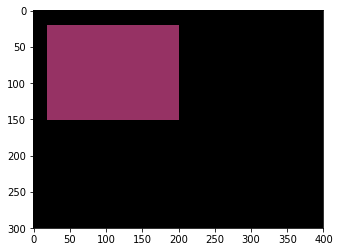

In [30]:
canvas = np.zeros((300,400,3),dtype=np.uint8)

cv2.rectangle(canvas, (20,20), (200,150), 
         (150,50,100), cv2.FILLED, cv2.LINE_8,0)

plt.imshow(canvas)
plt.show()

### 3. Polygon 그리기

`cv2.polylines(img, pts, isClosed, color[, thickness[, lineType[, shift]]])`

**parameters**
* img : Image where the circle is drawn.
* pts : Array of polygonal curves.
* isClosed : Flag indicating whether the drawn polylines are closed or not. If they are closed, the function draws a line from the last vertex of each curve to its first vertex.
* color : Rectangle color 
* thickness : Thickness of the polyline edges.

* lineType :
    * LINE_8 : 8-connected line
    * LINE_4 : 4-connected line
    * LINE_AA : antialiased line.
* shift : Number of fractional bits in the point coordinates

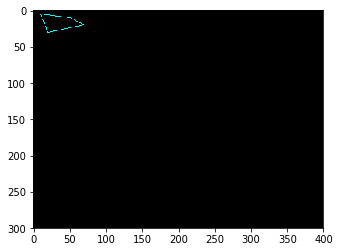

In [44]:
canvas = np.zeros((300,400,3),dtype=np.uint8)

pts = np.array([[10,5], 
                [20,30], 
                [70,20], 
                [50,10]], np.int32) # 각 꼭지점은 2차원 행렬로 선언
# 이미지에 표현하기 위해 3차원 행렬로 변환. 변환이전과 이후의 행렬 갯수는 동일해야함.
# -1은 원본에 해당하는 값을 그대로 유지.

canvas = cv2.polylines(canvas, [pts], True, (0,255,255),thickness=1)
plt.imshow(canvas)

> polylines은 안쪽 색을 채울 수 있는 방법이 없다. 그렇기 때문에 우리는 별도의 메소드를 이용해야한다.

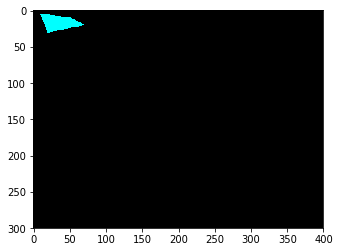

In [48]:
canvas = np.zeros((300,400,3),dtype=np.uint8)

pts = np.array([[10,5], 
                [20,30], 
                [70,20], 
                [50,10]], np.int32) # 각 꼭지점은 2차원 행렬로 선언
# 이미지에 표현하기 위해 3차원 행렬로 변환. 변환이전과 이후의 행렬 갯수는 동일해야함.
# -1은 원본에 해당하는 값을 그대로 유지.

canvas = cv2.fillPoly(canvas, [pts], (0,255,255))
plt.imshow(canvas)
plt.show()

### 4. 원 그리기

`cv2.circle(img, center, radian, color, thickness))`

**parameters**
* img : Image where the circle is drawn.
* center : Center of the circle.
* radius : Radius of the circle.
* color : Circle color.
* thickness : Thickness of the circle outline, if positive. Negative thickness means that a filled circle is to be drawn.
* lineType : Type of the circle boundary. See the line() description.
* shift : Number of fractional bits in the coordinates of the center and in the radius value.


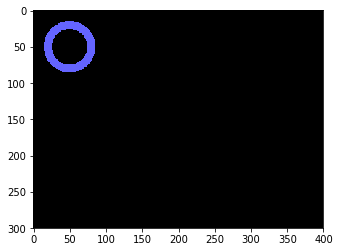

In [49]:
canvas = np.zeros((300,400,3),dtype=np.uint8)

cv2.circle(canvas, (50,50), 30, 
         (100,100,255), 10, cv2.LINE_8,0)

plt.imshow(canvas)
plt.show()

### 5. 이미지에 Text 추가

`cv2.putText(img, text, org, font, fontSacle, color)`

* img : Image
* text : Text string to be drawn.
* org - Bottom-left corner of the text string in the image.
* font - CvFont
    * CV_FONT_HERSHEY_SIMPLEX normal size sans-serif font
    * CV_FONT_HERSHEY_PLAIN small size sans-serif font
    * CV_FONT_HERSHEY_DUPLEX normal size sans-serif font (more complex than CV_FONT_HERSHEY_SIMPLEX )
    * CV_FONT_HERSHEY_COMPLEX normal size serif font
    * CV_FONT_HERSHEY_TRIPLEX normal size serif font (more complex than CV_FONT_HERSHEY_COMPLEX )
    * CV_FONT_HERSHEY_COMPLEX_SMALL smaller version of CV_FONT_HERSHEY_COMPLEX
    * CV_FONT_HERSHEY_SCRIPT_SIMPLEX hand-writing style font
    * CV_FONT_HERSHEY_SCRIPT_COMPLEX more complex variant of CV_FONT_HERSHEY_SCRIPT_SIMPLEX
* fontScale :  Font scale factor that is multiplied by the font-specific base size.
* color : Text Color
* thickness : Thickness of the lines used to draw a text.
* lineType : Line type. See the line for details
* bottomLeftOrigin : When true, the image data origin is at the bottom-left corner. 


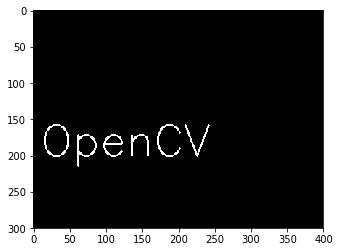

In [59]:
canvas = np.zeros((300,400,3),dtype=np.uint8)

cv2.putText(canvas, 'OpenCV', 
            (10,200), cv2.FONT_HERSHEY_SIMPLEX, 
            2, (255,255,255),2)

plt.imshow(canvas)
plt.show()

<hr>

Copyright(c) 2019 by Public AI. All rights reserved. last updated on 2019/02/01<br>
Writen by PAI, SangJae Kang(rocketgrowthsj@publicai.co.kr) 
<hr>